We start with uploading data:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
df1 = pd.read_csv('/content/drive/MyDrive/datasets/impacts.csv')
df2 = pd.read_csv('/content/drive/MyDrive/datasets/orbits.csv')
df1.head()
df2.head()

Mounted at /content/drive


,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
0,433 Eros,Amor Asteroid,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16
1,719 Albert,Amor Asteroid,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50
2,887 Alinda,Amor Asteroid,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40
3,1036 Ganymed,Amor Asteroid,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45
4,1221 Amor,Amor Asteroid,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70


Fisrt analysis of the dataframes: variables

In [3]:
#Variable list

print("Impacts: ")
print("\n\nAll variables:", list(df1.columns), "\n")
num_vars = df1.select_dtypes(include=['int64', 'float64']).columns
print("Numerical variables:", list(num_vars), "\n")
cat_vars = df1.select_dtypes(include=['object', 'category']).columns
print("Categorical variables:", list(cat_vars))
print("\n\nAsteroids: ")
print("\n\nAll variables:", list(df2.columns), "\n")
num_vars = df2.select_dtypes(include=['int64', 'float64']).columns
print("Numerical variables:", list(num_vars), "\n")
cat_vars = df2.select_dtypes(include=['object', 'category']).columns
print("Categorical variables:", list(cat_vars))

Impacts: 


All variables: ['Object Name', 'Period Start', 'Period End', 'Possible Impacts', 'Cumulative Impact Probability', 'Asteroid Velocity', 'Asteroid Magnitude', 'Asteroid Diameter (km)', 'Cumulative Palermo Scale', 'Maximum Palermo Scale', 'Maximum Torino Scale'] 

Numerical variables: ['Period Start', 'Period End', 'Possible Impacts', 'Cumulative Impact Probability', 'Asteroid Velocity', 'Asteroid Magnitude', 'Asteroid Diameter (km)', 'Cumulative Palermo Scale', 'Maximum Palermo Scale'] 

Categorical variables: ['Object Name', 'Maximum Torino Scale']


Asteroids: 


All variables: ['Object Name', 'Object Classification', 'Epoch (TDB)', 'Orbit Axis (AU)', 'Orbit Eccentricity', 'Orbit Inclination (deg)', 'Perihelion Argument (deg)', 'Node Longitude (deg)', 'Mean Anomoly (deg)', 'Perihelion Distance (AU)', 'Aphelion Distance (AU)', 'Orbital Period (yr)', 'Minimum Orbit Intersection Distance (AU)', 'Orbital Reference', 'Asteroid Magnitude'] 

Numerical variables: ['Epoch (TDB)', '

We can see, that main things to investigate are the properties of asteroids and their orbits and risk for the Earth. We'll focus on this two main tasks in this analysis. We start with the description of asteroids classification.

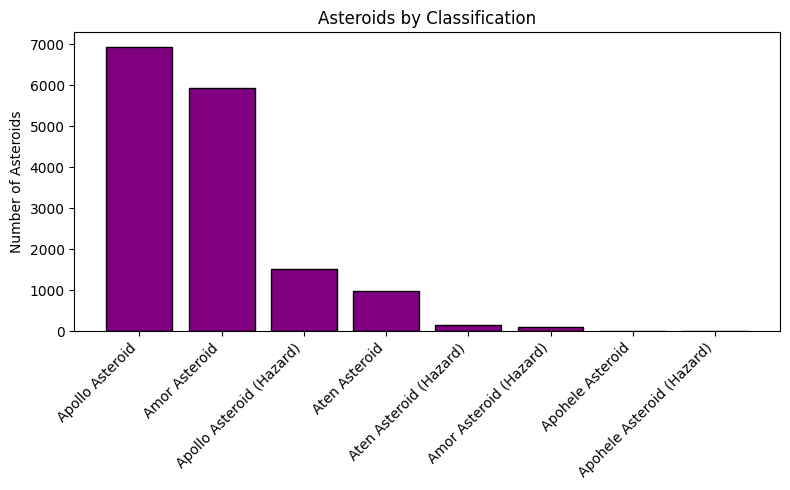

In [4]:
#Asteroid Classification Count

classification_counts = df2['Object Classification'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(classification_counts.index, classification_counts.values, color='purple', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Asteroids")
plt.title("Asteroids by Classification")
plt.tight_layout()
plt.show()

From this plot we can conclude that the biggest classes of asteroids are Appollo and Amor ones, while the smallest ones are Apohele.

Now we move on to investigation of orbits geometry. We start with the eccentricity and axis. I also wanted to highlight the asteroids that are closest to the Earth.

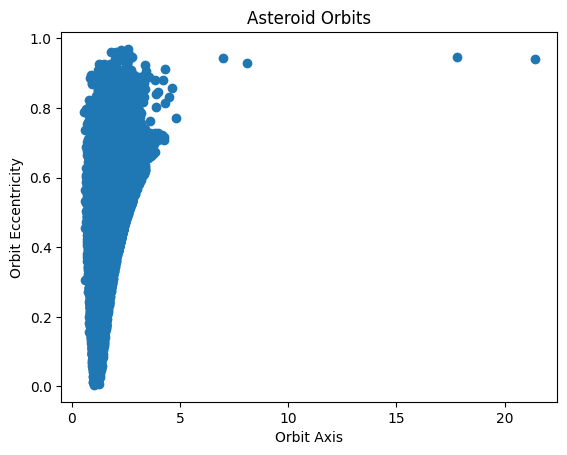


Minimum Orbit Intersection Distance: basic statistics 

count    15635.000000
mean         0.101884
std          0.105937
min          0.000000
25%          0.018700
50%          0.062000
75%          0.159150
max          0.706900
Name: Minimum Orbit Intersection Distance (AU), dtype: float64




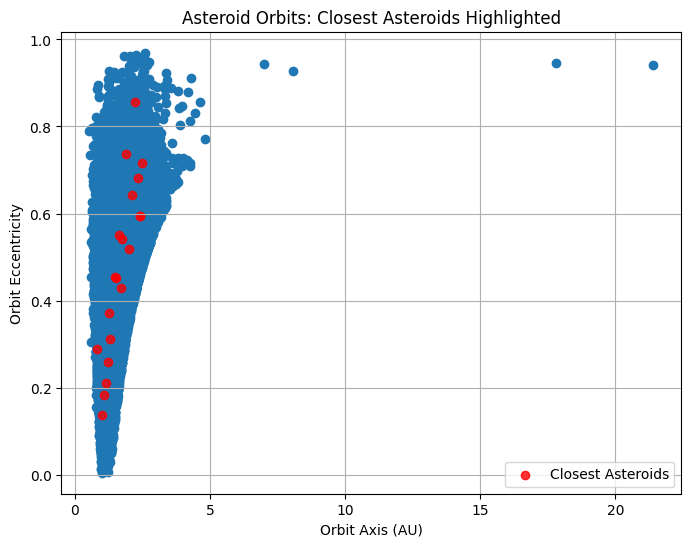

In [5]:
# Orbit Eccentricity on Orbit Axis

plt.scatter(df2['Orbit Axis (AU)'], df2['Orbit Eccentricity'])
plt.xlabel('Orbit Axis')
plt.ylabel('Orbit Eccentricity')
plt.title('Asteroid Orbits')
plt.show()

# Closest Asteroids Highlighted

moid_threshold = 0.01  # Criterium to select the closest asteroids
close_approaches = df2[df2['Minimum Orbit Intersection Distance (AU)'] < moid_threshold]
top_n = 20
close_approaches = df2.nsmallest(top_n, 'Minimum Orbit Intersection Distance (AU)')

print('\nMinimum Orbit Intersection Distance: basic statistics \n')

print(df2['Minimum Orbit Intersection Distance (AU)'].describe())
print("\n")

plt.figure(figsize=(8,6))
plt.scatter(df2['Orbit Axis (AU)'], df2['Orbit Eccentricity'])
plt.scatter(close_approaches['Orbit Axis (AU)'], close_approaches['Orbit Eccentricity'], color='red', alpha=0.8, label='Closest Asteroids')
plt.xlabel('Orbit Axis (AU)')
plt.ylabel('Orbit Eccentricity')
plt.title('Asteroid Orbits: Closest Asteroids Highlighted')
plt.legend()
plt.grid(True)
plt.show()

Another parameters of the orbit are inclanation and period - we'll determine the counts on each one.

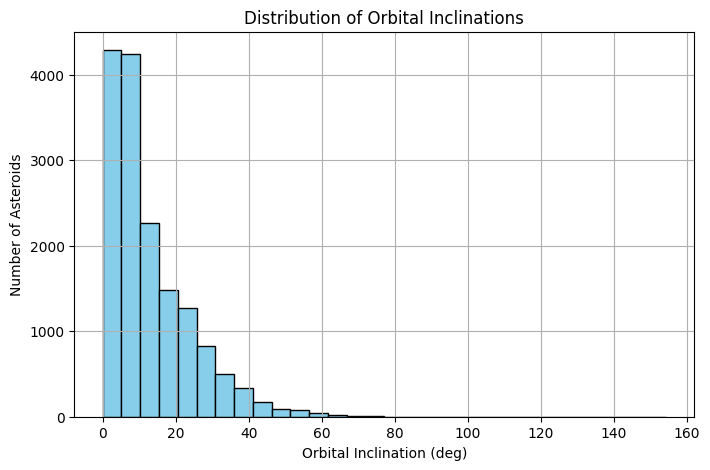

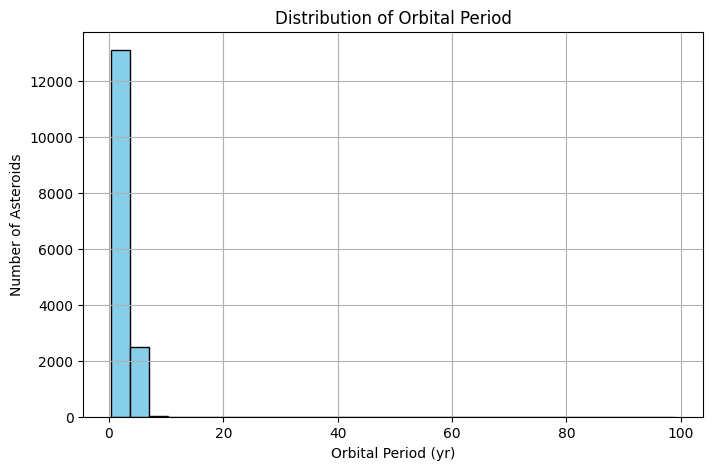

In [6]:
#Distribution of Orbital Inclinations

plt.figure(figsize=(8,5))
plt.hist(df2['Orbit Inclination (deg)'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Orbital Inclination (deg)")
plt.ylabel("Number of Asteroids")
plt.title("Distribution of Orbital Inclinations")
plt.grid(True)
plt.show()

#Distribution of Orbital Period

plt.figure(figsize=(8,5))
plt.hist(df2['Orbital Period (yr)'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Orbital Period (yr)")
plt.ylabel("Number of Asteroids")
plt.title("Distribution of Orbital Period")
plt.grid(True)
plt.show()

We see, that majority of asteroids has small inclanation (<20 deg) and period(<10 yr).

Perihelion and aphelion are another factors, that interest us. Again, I decided to highlight the asteroids, that are closest to the Earth.

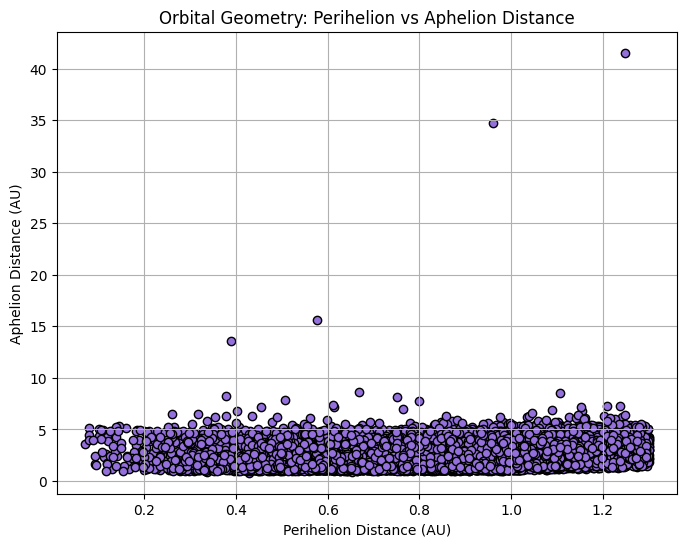

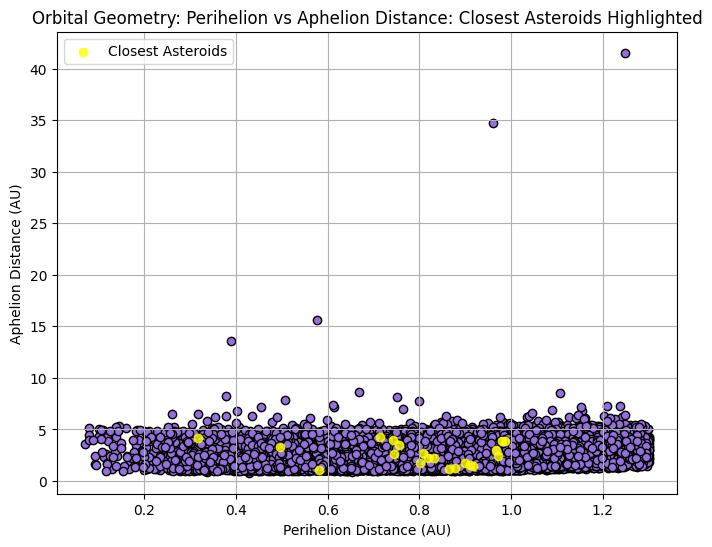

In [7]:
#Perihelion vs Aphelion Distance

plt.figure(figsize=(8,6))
plt.scatter(df2['Perihelion Distance (AU)'], df2['Aphelion Distance (AU)'], color='mediumpurple', edgecolor='black')
plt.xlabel("Perihelion Distance (AU)")
plt.ylabel("Aphelion Distance (AU)")
plt.title("Orbital Geometry: Perihelion vs Aphelion Distance")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(df2['Perihelion Distance (AU)'], df2['Aphelion Distance (AU)'], color='mediumpurple', edgecolor='black')
plt.scatter(close_approaches['Perihelion Distance (AU)'], close_approaches['Aphelion Distance (AU)'], color='yellow', alpha=0.8, label='Closest Asteroids')
plt.xlabel("Perihelion Distance (AU)")
plt.ylabel("Aphelion Distance (AU)")
plt.title('Orbital Geometry: Perihelion vs Aphelion Distance: Closest Asteroids Highlighted')
plt.legend()
plt.grid(True)
plt.show()

To sum up this analysis of geometry of the orbit, I decided to create a 3d plot, which represents the axis, inclanation and eccentricity of the asteroid. Here I also added color, that shows the risk score - parameter, that includes both number of possible impacts and cumutative impact probability.

count    6.830000e+02
mean     8.906212e-03
std      1.332418e-01
min      1.100000e-10
25%      4.900000e-07
50%      9.800000e-06
75%      3.335000e-04
max      3.380000e+00
Name: Risk Score, dtype: float64
15635 15635 15635


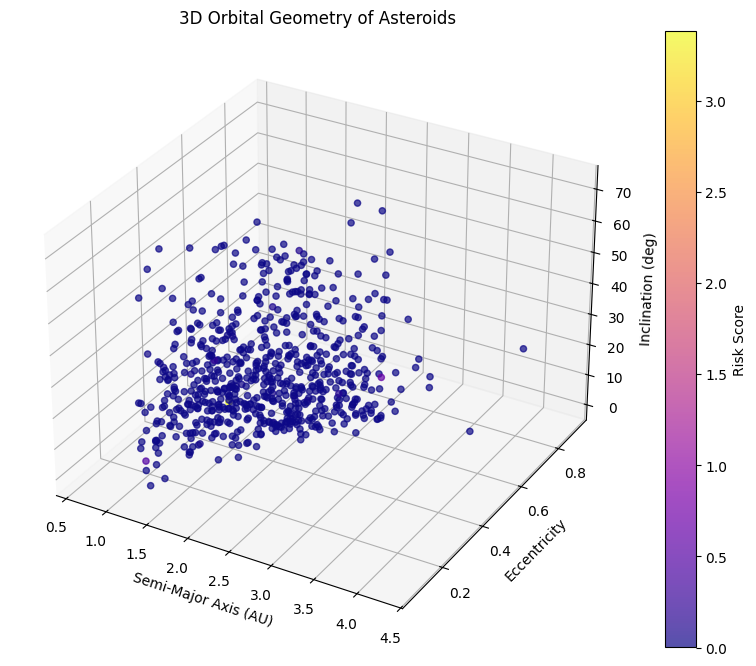

In [8]:
from mpl_toolkits.mplot3d import Axes3D

df2['Risk Score'] = df1['Possible Impacts'] * df1['Cumulative Impact Probability']

print(df2['Risk Score'].describe())
print(len(df2['Risk Score']), len(df2['Orbit Axis (AU)']), len(df2['Orbit Axis (AU)']))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df2['Orbit Axis (AU)'], df2['Orbit Eccentricity'], df2['Orbit Inclination (deg)'], c=df2['Risk Score'], cmap='plasma', alpha=0.7)
ax.set_xlabel("Semi-Major Axis (AU)")
ax.set_ylabel("Eccentricity")
ax.set_title("3D Orbital Geometry of Asteroids")
ax.set_zlabel("Inclination (deg)")
fig.colorbar(sc, ax=ax, label='Risk Score')
plt.show()

Focusing on risk - let's find 20 most dangerous asteroids and, in general, arrange the classification of them by risk score.

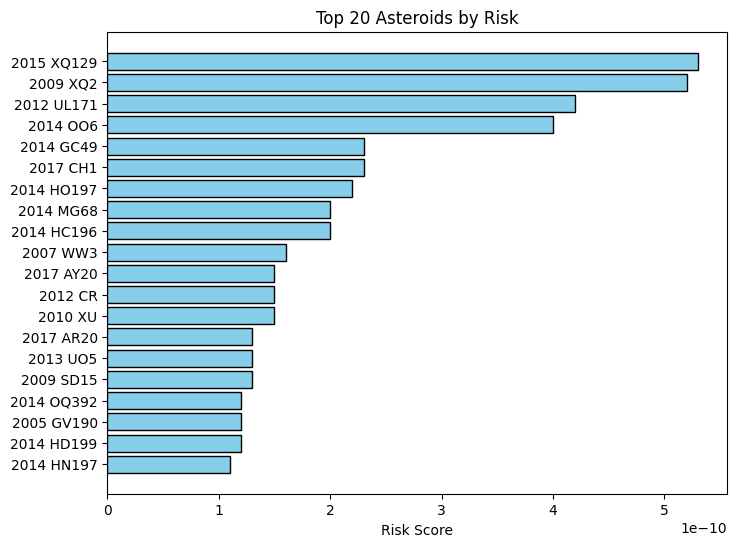

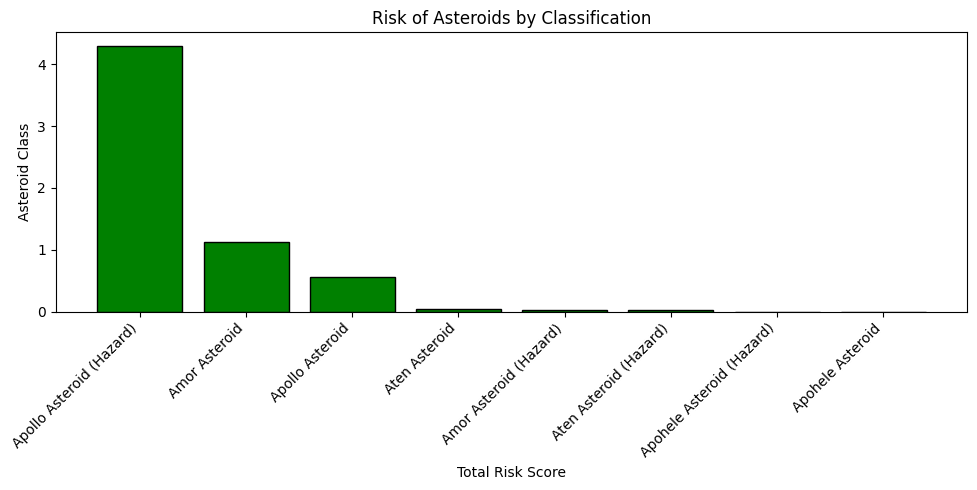

In [9]:
# Risk Assesment

# Top 20

df1['Risk Score'] = df1['Possible Impacts'] * df1['Cumulative Impact Probability']
risk_per_asteroid = df1.groupby('Object Name')['Risk Score'].sum().sort_values(ascending=True)
top20 = risk_per_asteroid.head(20)
plt.figure(figsize=(8,6))
plt.barh(top20.index, top20.values, color='skyblue', edgecolor='black')
plt.xlabel("Risk Score")
plt.title("Top 20 Asteroids by Risk")
plt.show()

#Risk by Classification

plt.figure(figsize=(10,5))
risk_by_class = df2.groupby('Object Classification')['Risk Score'].sum().sort_values(ascending=False)
plt.bar(risk_by_class.index, risk_by_class.values, color='green', edgecolor='black')
plt.xlabel("Total Risk Score")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Asteroid Class")
plt.title("Risk of Asteroids by Classification")
plt.tight_layout()
plt.show()

It is visible, that the most dangerous type of asteroid is Apollo.

The size of teh asteroid - it's diameter and size are also interesting parameters, which I decided to combine with MOID.

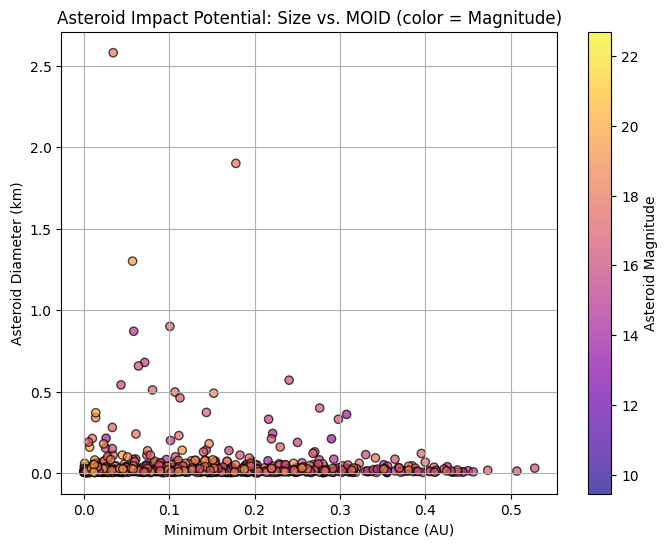

In [10]:
#Asteroid Impact Potential

plt.figure(figsize=(8,6))
df2['Asteroid Diameter (km)']=df1['Asteroid Diameter (km)']
sc = plt.scatter(df2['Minimum Orbit Intersection Distance (AU)'], df2['Asteroid Diameter (km)'], c=df2['Asteroid Magnitude'],cmap='plasma', alpha=0.7, edgecolor='black')
plt.colorbar(sc, label='Asteroid Magnitude')
plt.xlabel("Minimum Orbit Intersection Distance (AU)")
plt.ylabel("Asteroid Diameter (km)")
plt.title("Asteroid Impact Potential: Size vs. MOID (color = Magnitude)")
plt.grid(True)
plt.show()


And it is ineteresting, that most of the biggest asteroids have small MOID.